In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv2D, MaxPooling2D, BatchNormalization

np.random.seed(42)
tf.random.set_seed(42)

from getdata import *

In [8]:
X_train, X_test, y_train, y_test = get_kaggle()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify = y_train, random_state=42)

In [10]:
X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
X_test = np.repeat(X_test[..., np.newaxis], 3, -1)

In [11]:
INPUT_SHAPE = (208, 176, 3)
b_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)

model = Sequential()
model.add(InputLayer(input_shape=INPUT_SHAPE))
model.add(b_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

# Defining optimizer and learning rate
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.00001,
    decay_steps=10000,
    decay_rate=1,
    staircase=False)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train, y_train, epochs=30, shuffle=True, validation_data=(X_test, y_test))

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/30
120/120 [==============================] - 64s 387ms/step - loss: 0.6046 - accuracy: 0.6596 - val_loss: 0.5082 - val_accuracy: 0.7549
Epoch 2/30
120/120 [==============================] - 46s 386ms/step - loss: 0.4485 - accuracy: 0.7919 - val_loss: 0.3734 - val_accuracy: 0.8298
Epoch 3/30
120/120 [==============================] - 45s 378ms/step - loss: 0.3154 - accuracy: 0.8664 - val_loss: 0.2956 - val_accuracy: 0.8626
Epoch 4/30
120/120 [==============================] - 46s 381ms/step - loss: 0.1704 - accuracy: 0.9354 - val_loss: 0.2519 - val_accuracy: 0.8884
Epoch 5/30
120/120 [==============================] - 46s 380ms/step - loss: 0.1038 - accuracy: 0.9625 - val_loss: 0.1937 - val_accuracy: 0.9212
Epoch 6/30
120/120 [==============================] - 46s 382ms/step - loss: 0.0608 - accuracy: 0.9789 - val_loss: 0.0597 - val_accuracy: 0.9797
Epoch 7/30
120/120 [==============================] - 46s 383ms/s

KeyboardInterrupt: ignored

In [13]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

NameError: ignored

accuracy:  0.98
recall:  0.98
precision:  0.99


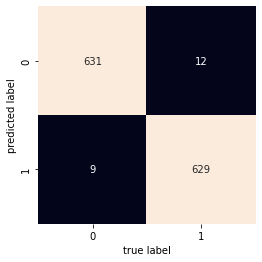

In [14]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))